
# Load Gdrive

# Import Library

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #untuk pelatihan model (train set) dan subset lainnya untuk menguji model (test se
from sklearn.linear_model import LogisticRegression #model logistic regression
from sklearn.ensemble import RandomForestClassifier #model random forrest
from sklearn.svm import SVC #model svm
from sklearn.preprocessing import StandardScaler,MinMaxScaler # fitur (feature scaling) pada dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

# Load Dataset

In [67]:
data = pd.read_csv("matches.csv")
data.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


# Cek kelengkapan data

In [68]:
data.shape
#cek jumlah baris dan kolom

(1389, 28)

In [69]:
data.info()
#tipe data nya berbeda
#informasi tipe data dan jumlah nilai non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1389 non-null   int64  
 1   date          1389 non-null   object 
 2   time          1389 non-null   object 
 3   comp          1389 non-null   object 
 4   round         1389 non-null   object 
 5   day           1389 non-null   object 
 6   venue         1389 non-null   object 
 7   result        1389 non-null   object 
 8   gf            1389 non-null   float64
 9   ga            1389 non-null   float64
 10  opponent      1389 non-null   object 
 11  xg            1389 non-null   float64
 12  xga           1389 non-null   float64
 13  poss          1389 non-null   float64
 14  attendance    693 non-null    float64
 15  captain       1389 non-null   object 
 16  formation     1389 non-null   object 
 17  referee       1389 non-null   object 
 18  match report  1389 non-null 

In [70]:
data.isnull().sum()
#cek jumlah data yang missnull or kosong

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [71]:
#melakukan clear data
#attendace => numeric (isikan dengan nilai rata-rata atau median)
#notes => kosong (kolom dihapus semua)
#dist => numeric (Isikan dengan nilai rata-rata atau median)
#unnamed => numeric (kolom dihapus semua)

data.drop('notes', axis=1, inplace=True)

In [72]:
mean_distance = data['dist'].mean()
data['dist'].fillna(mean_distance, inplace=True)

In [73]:
mean_attendance = data['attendance'].mean()
data['attendance'].fillna(mean_attendance, inplace=True)

In [74]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [75]:
data.isnull().sum()

date            0
time            0
comp            0
round           0
day             0
venue           0
result          0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
attendance      0
captain         0
formation       0
referee         0
match report    0
sh              0
sot             0
dist            0
fk              0
pk              0
pkatt           0
season          0
team            0
dtype: int64

In [76]:
data.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Anthony Taylor,Match Report,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Graham Scott,Match Report,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Martin Atkinson,Match Report,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Paul Tierney,Match Report,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Jonathan Moss,Match Report,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [77]:
data.describe()
#cek data yang kolom numerik

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,1.335493,1.380850,1.304176,1.338445,49.702664,36089.963925,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844
std,1.274235,1.291049,0.767268,0.789360,12.401897,12566.933472,5.268876,2.403866,2.987288,0.665389,0.352187,0.387804,0.497951
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
25%,0.000000,0.000000,0.700000,0.700000,40.000000,32087.000000,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,36089.963925,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000
75%,2.000000,2.000000,1.800000,1.800000,59.000000,36089.963925,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000
max,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000


In [78]:
data.corr()

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season
gf,1.000000,-0.111446,0.622286,-0.202577,0.169211,0.024045,0.341950,0.591047,-0.146093,0.029429,0.271810,0.251097,-0.010248
ga,-0.111446,1.000000,-0.190999,0.629024,-0.176823,0.055469,-0.195422,-0.164987,0.057406,-0.035289,-0.017780,-0.013058,0.028516
xg,0.622286,-0.190999,1.000000,-0.302950,0.375300,0.006457,0.697110,0.649701,-0.262545,0.086304,0.310362,0.360882,-0.016833
xga,-0.202577,0.629024,-0.302950,1.000000,-0.386014,0.045338,-0.334899,-0.243642,0.102455,-0.092364,-0.060077,-0.069621,0.031377
poss,0.169211,-0.176823,0.375300,-0.386014,1.000000,-0.020506,0.560978,0.359112,-0.075539,0.126875,0.012430,0.024560,-0.026480
attendance,0.024045,0.055469,0.006457,0.045338,-0.020506,1.000000,0.021327,-0.003036,-0.003650,-0.006360,-0.046972,-0.029703,0.225494
sh,0.341950,-0.195422,0.697110,-0.334899,0.560978,0.021327,1.000000,0.671973,-0.125484,0.218640,-0.016095,0.017829,0.039143
sot,0.591047,-0.164987,0.649701,-0.243642,0.359112,-0.003036,0.671973,1.000000,-0.173117,0.133337,0.004415,0.014365,-0.018545
dist,-0.146093,0.057406,-0.262545,0.102455,-0.075539,-0.003650,-0.125484,-0.173117,1.000000,0.179672,0.176402,0.184361,0.006853
fk,0.029429,-0.035289,0.086304,-0.092364,0.126875,-0.006360,0.218640,0.133337,0.179672,1.000000,-0.017371,0.001610,-0.001414


# Konversi tipe data menjadi numeric
1. 'gf'(float) menjadi int : goals dicetak tim
2. 'ga'(float) menjadi int : goal dicetak tim lawan
3. 'xg'(float) menjadi int : percobaan tembakan tim
4. 'xga'(float) menjadi int : percobaan tembakan tim lawan
5. 'poss'(float) menjadi int : ball possession or penguasaan
6. 'attendace'(float) menjadi int : kehadiran or penonton
7. 'sh'(float) menjadi int : tembakan oleh tim
8. 'sot'(float) menjadi int : tembakan sesuai target
9. 'dist'(float) menjadi int : jarak tembakan
10. 'fk'(float) menjadi int : tendangan bebas
11. 'pk'(float) menjadi int : tendangan pinalti
12. 'pkaat'(float) menjadi int : usaha mendapatkan pinalti

In [79]:
data['gf'] = data['gf'].astype(int)

In [80]:
data['ga'] = data['ga'].astype(int)

In [81]:
data['xg'] = data['xg'].astype(int)

In [82]:
data['xga'] = data['xga'].astype(int)

In [83]:
data['poss'] = data['poss'].astype(int)

In [84]:
data['attendance'] = data['attendance'].astype(int)

In [85]:
data['sh'] = data['sh'].astype(int)

In [86]:
data['sot'] = data['sot'].astype(int)

In [87]:
data['dist'] = data['dist'].astype(int)

In [88]:
data['fk'] = data['fk'].astype(int)

In [89]:
data['pk'] = data['pk'].astype(int)

In [90]:
data['pkatt'] = data['pkatt'].astype(int)

In [91]:
#menambahkan column venue_code dengan dtype int
data['venue_code']=data['venue'].astype('category').cat.codes

In [92]:
#Menambahkan Column opp_code dengan dtype int
data['opp_code']=data['opponent'].astype('category').cat.codes

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1389 non-null   object
 1   time          1389 non-null   object
 2   comp          1389 non-null   object
 3   round         1389 non-null   object
 4   day           1389 non-null   object
 5   venue         1389 non-null   object
 6   result        1389 non-null   object
 7   gf            1389 non-null   int32 
 8   ga            1389 non-null   int32 
 9   opponent      1389 non-null   object
 10  xg            1389 non-null   int32 
 11  xga           1389 non-null   int32 
 12  poss          1389 non-null   int32 
 13  attendance    1389 non-null   int32 
 14  captain       1389 non-null   object
 15  formation     1389 non-null   object
 16  referee       1389 non-null   object
 17  match report  1389 non-null   object
 18  sh            1389 non-null   int32 
 19  sot   

In [94]:
#Melihat Code Opponent 
data[['opponent','opp_code']].value_counts().sort_index()


opponent         opp_code
Arsenal          0           69
Aston Villa      1           69
Brentford        2           32
Brighton         3           70
Burnley          4           69
Chelsea          5           68
Crystal Palace   6           69
Everton          7           68
Fulham           8           38
Leeds United     9           69
Leicester City   10          68
Liverpool        11          71
Manchester City  12          69
Manchester Utd   13          70
Newcastle Utd    14          71
Norwich City     15          31
Sheffield Utd    16          38
Southampton      17          71
Tottenham        18          70
Watford          19          31
West Brom        20          38
West Ham         21          70
Wolves           22          70
dtype: int64

# Melakukan Visualisasi Data

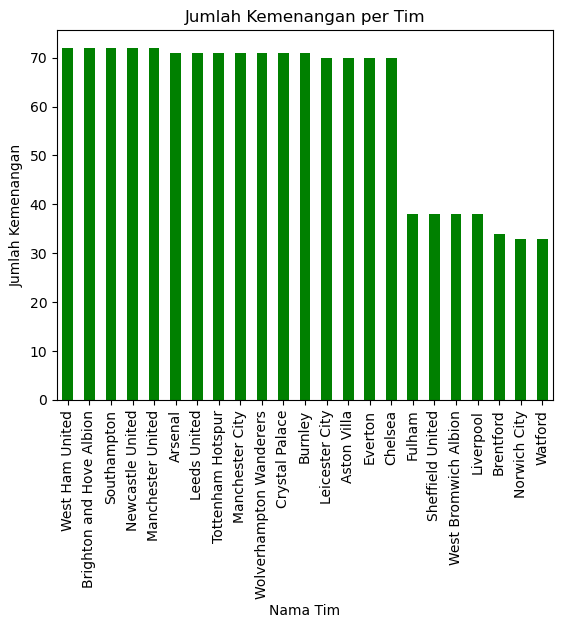

In [95]:
data_grouped_by_team = data.groupby('team')['result'].count().sort_values(ascending=False)
data_grouped_by_team.plot(kind='bar', color='green')
plt.title('Jumlah Kemenangan per Tim')
plt.xlabel('Nama Tim')
plt.ylabel('Jumlah Kemenangan')
plt.show()

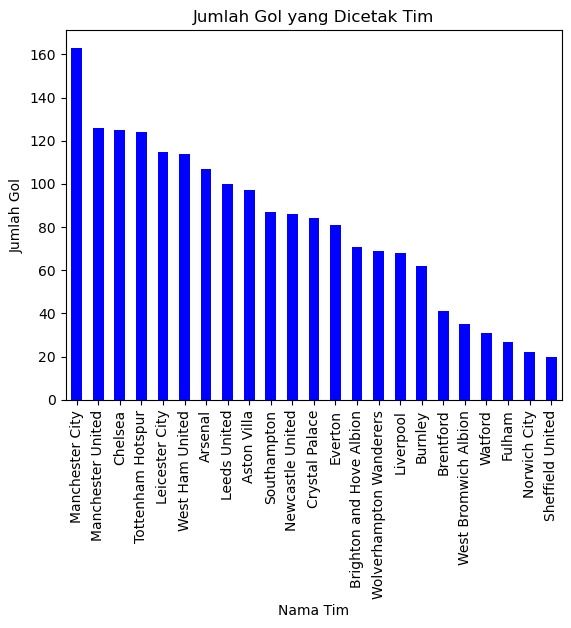

In [96]:
data_grouped_by_team = data.groupby('team')['gf'].sum().sort_values(ascending=False)
data_grouped_by_team.plot(kind='bar', color='blue')
plt.title('Jumlah Gol yang Dicetak Tim')
plt.xlabel('Nama Tim')
plt.ylabel('Jumlah Gol')
plt.show()

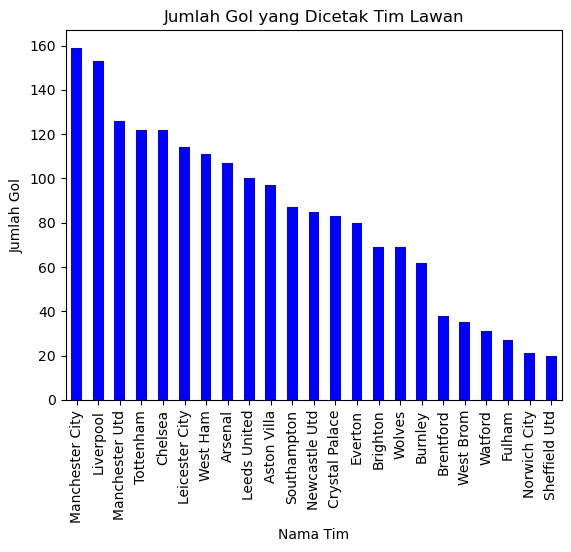

In [97]:
data_grouped_by_team = data.groupby('opponent')['ga'].sum().sort_values(ascending=False)
data_grouped_by_team.plot(kind='bar', color='blue')
plt.title('Jumlah Gol yang Dicetak Tim Lawan')
plt.xlabel('Nama Tim')
plt.ylabel('Jumlah Gol')
plt.show()

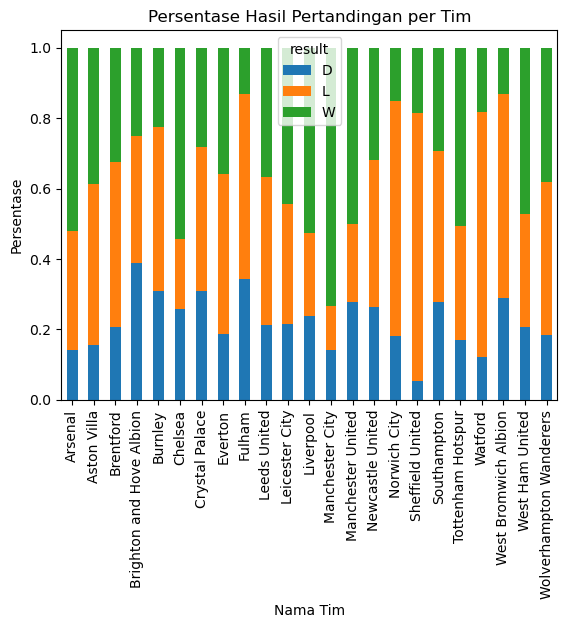

In [98]:
data_grouped_by_team = data.groupby('team')['result'].value_counts(normalize=True).unstack()
data_grouped_by_team.plot(kind='bar', stacked=True)
plt.title('Persentase Hasil Pertandingan per Tim')
plt.xlabel('Nama Tim')
plt.ylabel('Persentase')
plt.show()

# Pemilihan Fitur

# Pemisahan Data (Train-Test Split):

In [99]:
# memilih variabel independen(X) dan variabel dependen (y)
# variable (X)
#1. Gol yg dicetak tim tuan rumah
#2. Gol yg dicetak tim tamu
#3. Posisi klasmen masing-masing tim sebelum pertandingan
#4. Rata-rata jumlah penonton pada pertandingan

#variabel dependen (y)
#1. Hasil pertandingan (kemenangan(W), kekalahan(L), imbang(D))

fitur = data[['gf', 'ga', 'xg', 'xga', 'sh', 'sot', 'attendance', 'poss', 'dist', 'fk', 'pkatt', 'formation']]
target = data['result']


In [100]:
print(data.head())

         date   time            comp        round  day venue result  gf  ga  \
0  2021-08-15  16:30  Premier League  Matchweek 1  Sun  Away      L   0   1   
1  2021-08-21  15:00  Premier League  Matchweek 2  Sat  Home      W   5   0   
2  2021-08-28  12:30  Premier League  Matchweek 3  Sat  Home      W   5   0   
3  2021-09-11  15:00  Premier League  Matchweek 4  Sat  Away      W   1   0   
4  2021-09-18  15:00  Premier League  Matchweek 5  Sat  Home      D   0   0   

         opponent  ...  sh  sot  dist  fk pk pkatt season             team  \
0       Tottenham  ...  18    4    16   1  0     0   2022  Manchester City   
1    Norwich City  ...  16    4    17   1  0     0   2022  Manchester City   
2         Arsenal  ...  25   10    14   0  0     0   2022  Manchester City   
3  Leicester City  ...  25    8    14   0  0     0   2022  Manchester City   
4     Southampton  ...  16    1    15   1  0     0   2022  Manchester City   

   venue_code  opp_code  
0           0        18  
1   

In [101]:
X = data[['gf', 'ga', 'xg', 'xga', 'sh', 'sot', 'attendance', 'poss', 'dist', 'fk', 'pkatt', 'formation']]
y = data.result

In [102]:
X

,gf,ga,xg,xga,sh,sot,attendance,poss,dist,fk,pkatt,formation
0,0,1,1,1,18,4,58262,64,16,1,0,4-3-3
1,5,0,2,0,16,4,51437,67,17,1,0,4-3-3
2,5,0,3,0,25,10,52276,80,14,0,0,4-3-3
3,1,0,2,0,25,8,32087,61,14,0,0,4-3-3
4,0,0,1,0,16,1,52698,63,15,1,0,4-3-3
...,...,...,...,...,...,...,...,...,...,...,...,...
1384,0,4,0,2,8,1,36089,34,17,0,0,3-4-1-2
1385,0,2,0,2,7,0,36089,50,11,1,0,3-5-2
1386,1,0,1,1,10,3,36089,38,17,0,0,3-4-3
1387,0,1,0,1,11,1,10000,50,16,1,0,3-4-3


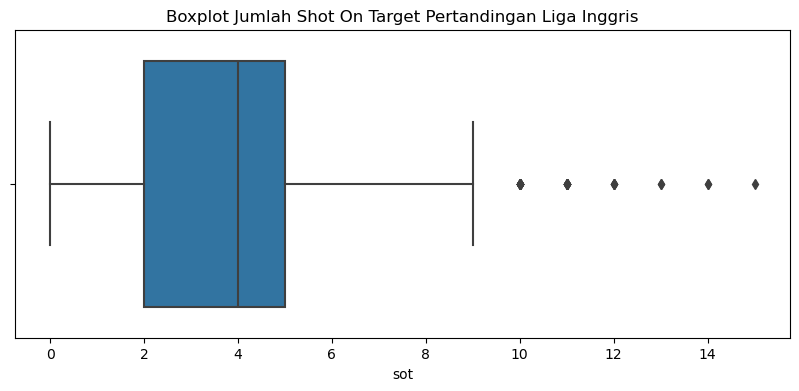

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,4))
sns.boxplot(x = 'sot',
          data = data,
          orient = 'horizontal')
plt.title('Boxplot Jumlah Shot On Target Pertandingan Liga Inggris')
plt.show()

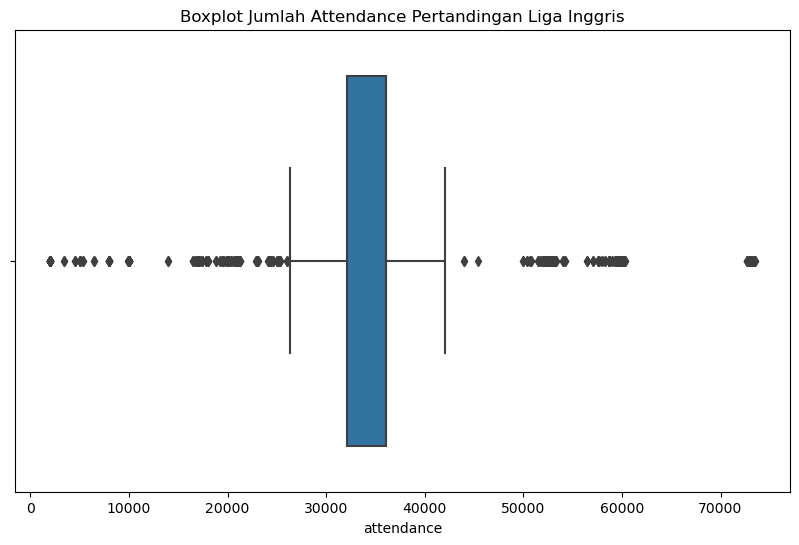

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='attendance',
            data=data)
plt.title('Boxplot Jumlah Attendance Pertandingan Liga Inggris')
plt.show()

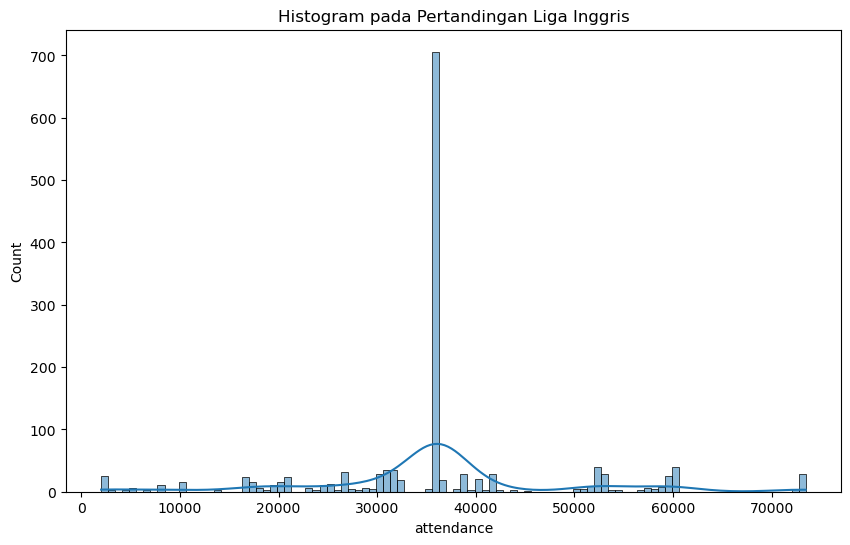

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='attendance', kde=True)
plt.title('Histogram pada Pertandingan Liga Inggris')
plt.show()

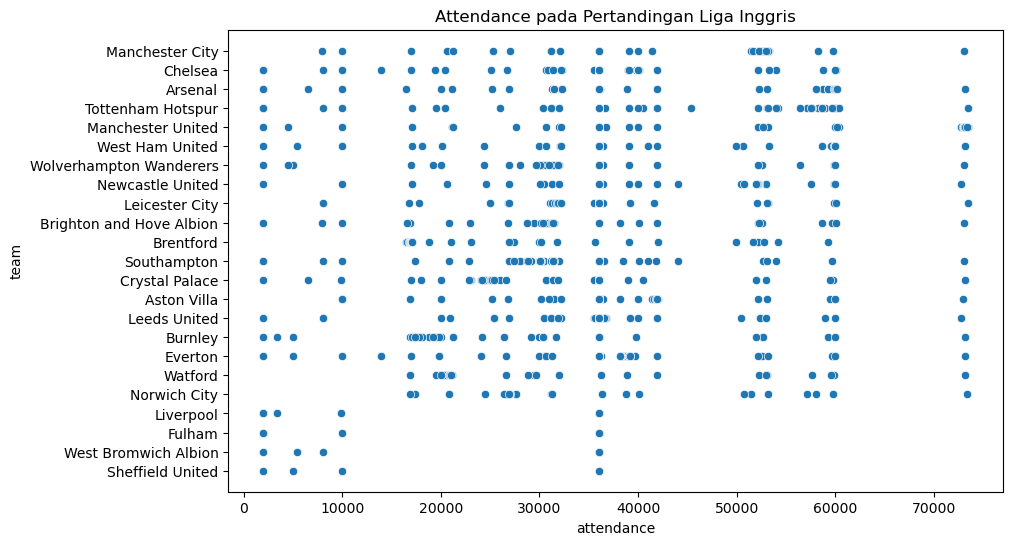

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='attendance', y='team', data=data)
plt.title('Attendance pada Pertandingan Liga Inggris')
plt.show()


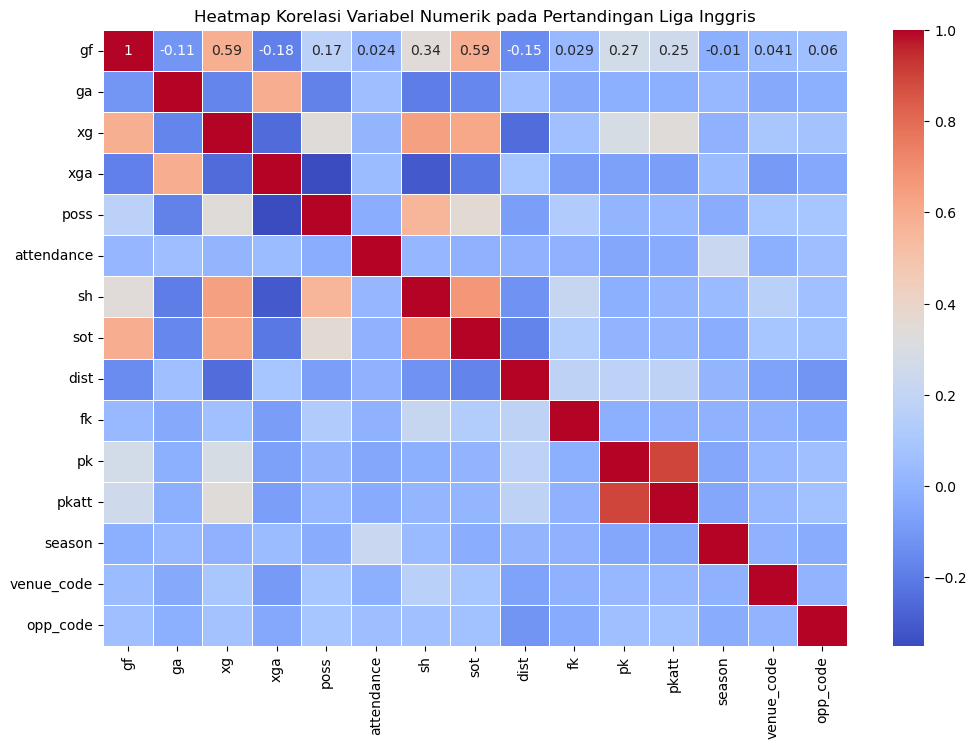

In [107]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi Variabel Numerik pada Pertandingan Liga Inggris')
plt.show()

In [108]:
data.describe()

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,venue_code,opp_code
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.00000,1389.000000
mean,1.335493,1.380850,0.856012,0.890569,49.702664,36089.480922,12.153348,4.041037,16.572354,0.455724,0.119510,0.147588,2021.452844,0.49964,10.702664
std,1.274235,1.291049,0.804885,0.827902,12.401897,12566.933481,5.268876,2.403866,2.998556,0.665389,0.352187,0.387804,0.497951,0.50018,6.600923
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,40.000000,32087.000000,8.000000,2.000000,15.000000,0.000000,0.000000,0.000000,2021.000000,0.00000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,50.000000,36089.000000,12.000000,4.000000,16.000000,0.000000,0.000000,0.000000,2021.000000,0.00000,11.000000
75%,2.000000,2.000000,1.000000,1.000000,59.000000,36089.000000,15.000000,5.000000,18.000000,1.000000,0.000000,0.000000,2022.000000,1.00000,17.000000
max,9.000000,9.000000,4.000000,5.000000,82.000000,73458.000000,31.000000,15.000000,34.000000,4.000000,3.000000,3.000000,2022.000000,1.00000,22.000000


# Melakukan tes data 0,2 atau 0,3 (20% atau 30%)

In [109]:
# y = train_label, test_label
# X = train_data, test_data
from sklearn.model_selection import train_test_split
train_data, train_label, test_data, test_label = train_test_split(X, y, test_size = 0.2)

In [110]:
print("Jumlah data training:", len(X))

Jumlah data training: 1389


In [111]:
print("Jumlah data testing:", len(y))

Jumlah data testing: 1389


In [112]:
X

,gf,ga,xg,xga,sh,sot,attendance,poss,dist,fk,pkatt,formation
0,0,1,1,1,18,4,58262,64,16,1,0,4-3-3
1,5,0,2,0,16,4,51437,67,17,1,0,4-3-3
2,5,0,3,0,25,10,52276,80,14,0,0,4-3-3
3,1,0,2,0,25,8,32087,61,14,0,0,4-3-3
4,0,0,1,0,16,1,52698,63,15,1,0,4-3-3
...,...,...,...,...,...,...,...,...,...,...,...,...
1384,0,4,0,2,8,1,36089,34,17,0,0,3-4-1-2
1385,0,2,0,2,7,0,36089,50,11,1,0,3-5-2
1386,1,0,1,1,10,3,36089,38,17,0,0,3-4-3
1387,0,1,0,1,11,1,10000,50,16,1,0,3-4-3


In [113]:
#mapping data
data['result'] = data['result'].map({"W": 2, "D": 1, "L": 0})

In [114]:
data['result'] = data['result'].astype(int)

# Melakukan Ekstraksi fitur

In [115]:
df = pd.DataFrame(data)

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Memilih fitur-fitur yang akan di-scaling
features_to_scale = ['gf', 'ga', 'xg', 'xga', 'sh', 'sot', 'attendance', 'poss', 'dist', 'fk', 'pkatt']

# Melakukan scaling pada fitur-fitur yang dipilih
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print(df)

            date   time            comp         round  day venue  result  \
0     2021-08-15  16:30  Premier League   Matchweek 1  Sun  Away       0   
1     2021-08-21  15:00  Premier League   Matchweek 2  Sat  Home       2   
2     2021-08-28  12:30  Premier League   Matchweek 3  Sat  Home       2   
3     2021-09-11  15:00  Premier League   Matchweek 4  Sat  Away       2   
4     2021-09-18  15:00  Premier League   Matchweek 5  Sat  Home       1   
...          ...    ...             ...           ...  ...   ...     ...   
1384  2021-05-02  19:15  Premier League  Matchweek 34  Sun  Away       0   
1385  2021-05-08  15:00  Premier League  Matchweek 35  Sat  Home       0   
1386  2021-05-16  19:00  Premier League  Matchweek 36  Sun  Away       2   
1387  2021-05-19  18:00  Premier League  Matchweek 37  Wed  Away       0   
1388  2021-05-23  16:00  Premier League  Matchweek 38  Sun  Home       2   

            gf        ga        opponent  ...        sh       sot      dist  \
0     0.

In [116]:
from sklearn.linear_model import LinearRegression
df = pd.DataFrame(data)

# Pilih fitur-fitur dan target
features = ['sh', 'sot', 'attendance']
target = 'result'

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Tanpa Scaling
model_no_scaling = LinearRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)
print(f'MSE tanpa scaling: {mse_no_scaling}')

# Dengan Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LinearRegression()
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
mse_with_scaling = mean_squared_error(y_test, y_pred_with_scaling)
print(f'MSE dengan scaling: {mse_with_scaling}')

MSE tanpa scaling: 0.6772751206804442
MSE dengan scaling: 0.6772751206804442


In [117]:
df = pd.DataFrame(data)

# Pilih fitur-fitur dan target
features = ['gf', 'ga', 'xg', 'xga', 'sh', 'sot', 'attendance', 'poss', 'dist', 'fk', 'pkatt']
target = 'result'

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Tanpa Scaling
model_no_scaling = LinearRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)
print(f'MSE tanpa scaling: {mse_no_scaling}')

# Dengan Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LinearRegression()
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
mse_with_scaling = mean_squared_error(y_test, y_pred_with_scaling)
print(f'MSE dengan scaling: {mse_with_scaling}')

MSE tanpa scaling: 0.18203938693612282
MSE dengan scaling: 0.1820393869361844


## Rendah: MSE mendekati 0
## Sedang: MSE dalam skala yang setara dengan variabel target
## Tinggi: MSE jauh di atas skala variabel target

Cek stabilan MSE kinerja dengan menggunakan LiniearRegression

In [118]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, mean_squared_error

df = pd.DataFrame(data)

# Pilih fitur-fitur dan target
features = ['sh', 'sot', 'attendance']
target = 'result'

# Pisahkan data menjadi fitur dan target
X = df[features]
y = df[target]

# Buat MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Buat model regresi linear
model = LinearRegression()

# Definisikan metrik evaluasi (MSE) yang akan digunakan dalam validasi silang
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Lakukan validasi silang dan hitung rata-rata MSE
cv_mse_scores = cross_val_score(model, X_scaled, y, cv=3, scoring=mse_scorer)

# Konversi skor negatif menjadi positif (karena make_scorer menggunakan nilai yang lebih rendah lebih baik)
cv_mse_scores = -cv_mse_scores

# Tampilkan skor MSE di setiap lipatan
print("MSE Scores (each fold):", cv_mse_scores)

# Tampilkan rata-rata MSE di seluruh lipatan
print("Average MSE:", cv_mse_scores.mean())

MSE Scores (each fold): [0.64305658 0.61596018 0.68346722]
Average MSE: 0.6474946589558789


In [119]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, mean_squared_error

df = pd.DataFrame(data)

# Pilih fitur-fitur dan target
features = ['gf', 'ga', 'xg', 'xga', 'sh', 'sot', 'attendance', 'poss', 'dist', 'fk', 'pkatt']
target = 'result'

# Pisahkan data menjadi fitur dan target
X = df[features]
y = df[target]

# Buat MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Buat model regresi linear
model = LinearRegression()

# Definisikan metrik evaluasi (MSE) yang akan digunakan dalam validasi silang
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Lakukan validasi silang dan hitung rata-rata MSE
cv_mse_scores = cross_val_score(model, X_scaled, y, cv=3, scoring=mse_scorer)

# Konversi skor negatif menjadi positif (karena make_scorer menggunakan nilai yang lebih rendah lebih baik)
cv_mse_scores = -cv_mse_scores

# Tampilkan skor MSE di setiap lipatan
print("MSE Scores (each fold):", cv_mse_scores)

# Tampilkan rata-rata MSE di seluruh lipatan
print("Average MSE:", cv_mse_scores.mean())

MSE Scores (each fold): [0.20578706 0.22179659 0.20743883]
Average MSE: 0.21167416078608067


# Model 1 : Linear Regression

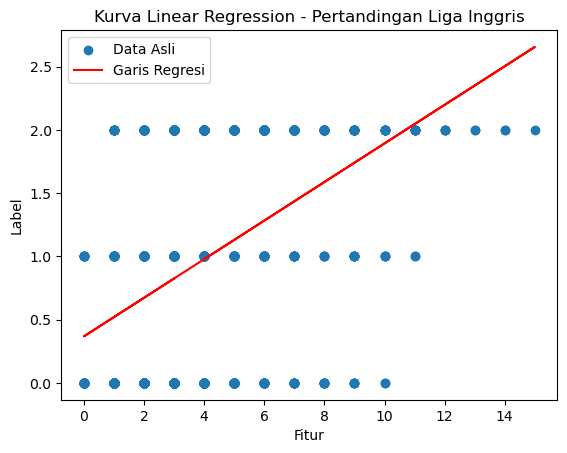

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Misalkan Anda sudah memiliki DataFrame df dengan fitur dan label dari dataset Liga Inggris
# Gantilah 'fitur' dan 'label' dengan nama kolom yang sesuai dengan dataset Anda

# Pilih fitur dan label
feature = 'sot'
label = 'result'

# Ambil data dari DataFrame
X = df[feature].values.reshape(-1, 1)
y = df[label].values

# Buat dan latih model Linear Regression
model = LinearRegression()
model.fit(X, y)

# Prediksi menggunakan model
y_pred = model.predict(X)

# Memplot data dan garis regresi
plt.scatter(X, y, label='Data Asli')
plt.plot(X, y_pred, color='red', label='Garis Regresi')
plt.xlabel('Fitur')
plt.ylabel('Label')
plt.title('Kurva Linear Regression - Pertandingan Liga Inggris')
plt.legend()
plt.show()

Model 2 : Logistic Regression

In [121]:
#import library

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#define dataset
df = pd.DataFrame(data)

# Pilih fitur-fitur dan target
features = ['gf', 'ga', 'xg', 'xga', 'sh', 'sot', 'attendance', 'poss', 'dist', 'fk', 'pkatt','venue_code']
target = 'result'

# Pisahkan data menjadi fitur dan target
X = df[features]
y = df[target]

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data (opsional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Buat model regresi logistik
model = LogisticRegression()

# Lakukan pelatihan model pada set pelatihan
model.fit(X_train, y_train)

# Evaluasi model pada set pengujian
y_pred = model.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Laporan Klasifikasi
class_report = classification_report(y_test, y_pred)
print(f'Laporan Klasifikasi:\n{class_report}')

# Validasi silang dengan metrik akurasi
cv_accuracy_scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
print("Accuracy Scores (each fold):", cv_accuracy_scores)
print("Average Accuracy:", cv_accuracy_scores.mean())

Akurasi: 1.0
Confusion Matrix:
[[112   0   0]
 [  0  59   0]
 [  0   0 107]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00       107

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278

Accuracy Scores (each fold): [0.73866091 0.79265659 0.76025918]
Average Accuracy: 0.763858891288697


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [122]:
#import library

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#define dataset
df = pd.DataFrame(data)

# Pilih fitur-fitur dan target
features = ['sh', 'sot', 'attendance']
target = 'result'

# Pisahkan data menjadi fitur dan target
X = df[features]
y = df[target]

#Reshape Variabel Y
y = y.values.reshape(-1,1)

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data (opsional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Buat model regresi logistik
model = LogisticRegression()

# Lakukan pelatihan model pada set pelatihan
model.fit(X_train, y_train)

# Evaluasi model pada set pengujian
y_pred = model.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Laporan Klasifikasi
class_report = classification_report(y_test, y_pred)
print(f'Laporan Klasifikasi:\n{class_report}')

# Validasi silang dengan metrik akurasi
cv_accuracy_scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
print("Accuracy Scores (each fold):", cv_accuracy_scores)
print("Average Accuracy:", cv_accuracy_scores.mean())

Akurasi: 0.5143884892086331
Confusion Matrix:
[[80  0 32]
 [44  0 15]
 [44  0 63]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.48      0.71      0.57       112
           1       0.00      0.00      0.00        59
           2       0.57      0.59      0.58       107

    accuracy                           0.51       278
   macro avg       0.35      0.43      0.38       278
weighted avg       0.41      0.51      0.45       278

Accuracy Scores (each fold): [0.45140389 0.47948164 0.48596112]
Average Accuracy: 0.4722822174226062


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricW

Menampilkan kurva S (sigmoid)

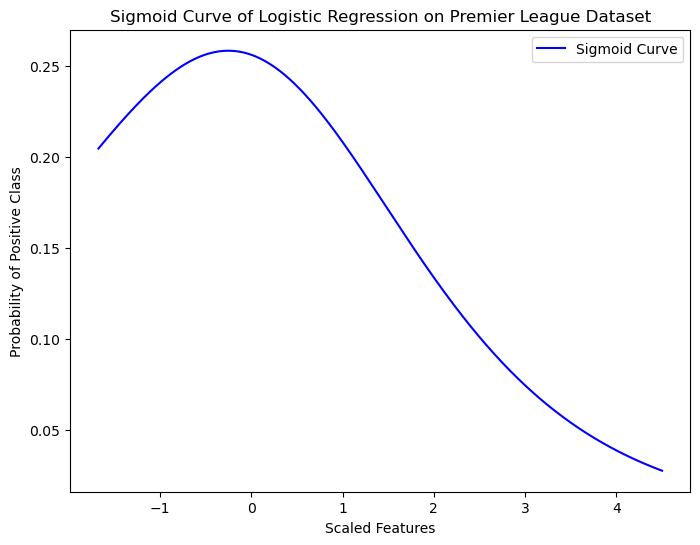

In [123]:
#import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# feature and target
features = ['sot']
target = 'result'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scalling and fit transform
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model Logistic Regressio
model = LogisticRegression()
model.fit(X_train, y_train)

# Generate values sigmaid fitur
x_values = np.linspace(np.min(X_train), np.max(X_train), 1000).reshape(-1, len(features))
#x_values = np.linspace(np.min(X_train), np.max(X_train), 1000)[:, np.newaxis]


# Predict proba model
y_values = model.predict_proba(x_values)[:, 1]

# sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(x_values[:, 0], y_values, label='Sigmoid Curve', color='blue')
plt.title('Sigmoid Curve of Logistic Regression on Premier League Dataset')
plt.xlabel('Scaled Features')  # Update with appropriate feature names or labels
plt.ylabel('Probability of Positive Class')
plt.legend()
plt.show()

# Model 3 : Random Forrest

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Misalkan Anda sudah memiliki DataFrame df dengan fitur dan label dari dataset Liga Inggris
# Gantilah 'fitur1', 'fitur2', 'fitur3', dan 'label' dengan nama fitur dan label yang sesuai

# Pilih fitur dan label
features = ['sh', 'sot', 'attendance']
target = 'result'

X = df[features]
y = df[target]

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest
model = RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100)

# Latih model pada set pelatihan
model.fit(X_train, y_train)

# Evaluasi model pada set pengujian
y_pred = model.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Laporan Klasifikasi
class_report = classification_report(y_test, y_pred)
print(f'Laporan Klasifikasi:\n{class_report}')

Akurasi: 0.5107913669064749
Confusion Matrix:
[[66  5 41]
 [30  6 23]
 [36  1 70]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.59      0.54       112
           1       0.50      0.10      0.17        59
           2       0.52      0.65      0.58       107

    accuracy                           0.51       278
   macro avg       0.51      0.45      0.43       278
weighted avg       0.51      0.51      0.48       278



c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [125]:
# Pilih fitur-fitur dan target
features = ['xg', 'xga', 'sh', 'sot',  'poss', 'dist','attendance','fk','pkatt','venue_code','opp_code']
target = 'result'
X=df[features]
y=df[target]

y=y.values.reshape(-1,1)
# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

#Membuat model prediktor
predictor=rf.predict(X_test)
y_train_pred = rf.predict(X_train)

# Calculate accuracy on training set
print(f'nilai dari akurasi train adalah : {accuracy_score(y_train, y_train_pred)}')
print(confusion_matrix(y_test,predictor))
print(classification_report(y_test,predictor))
print(f'nilai dari akurasi test adalah {accuracy_score(y_test,predictor)}')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11964\3117973542.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


nilai dari akurasi train adalah : 1.0
[[87  2 23]
 [33  7 19]
 [30  2 75]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.66       112
           1       0.64      0.12      0.20        59
           2       0.64      0.70      0.67       107

    accuracy                           0.61       278
   macro avg       0.62      0.53      0.51       278
weighted avg       0.62      0.61      0.57       278

nilai dari akurasi test adalah 0.6079136690647482


In [126]:
predictor

array([0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2])

In [127]:
import pickle
pickle_out=open('model.pkl',mode='wb')
pickle.dump(rf,pickle_out)
pickle_out.close()